In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim


from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [3]:
BS = 64

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((.5), (.5))])

mnist_train = datasets.MNIST('data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST('data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(mnist_train, batch_size=BS, shuffle=True)
testloader = torch.utils.data.DataLoader(mnist_test, batch_size=BS, shuffle=False)

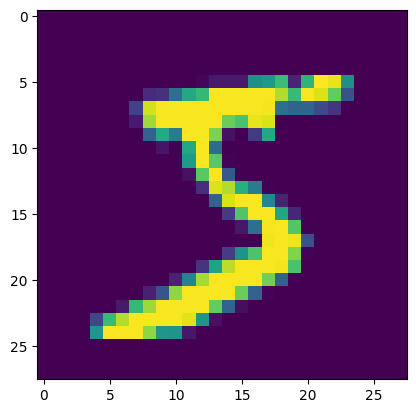

In [4]:
plt.imshow(mnist_train[0][0].numpy().squeeze())

In [5]:
class MnistClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.fc1 = nn.Linear(in_features=64*4*4, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=10) # 10 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.dropout(x)
        x = x.view(-1, 64*4*4)
        x = F.relu(self.fc1(x))
        return self.fc3(x)
        
        

In [6]:
Epochs = 19
model = MnistClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

device = torch.device("mps")
model.to(device)

model.compile()

In [7]:
losses = []
for epoch in range(Epochs):
    running_loss = 0.0
    for x, y in trainloader:
        x = x.to(device)
        y = y.to(device)
        model.train()
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader)
    losses.append(epoch_loss)

    print(f"epoch: {epoch} | train_loss: {epoch_loss}")


BackendCompilerFailed: backend='inductor' raised:
AssertionError: Device mps not supported

Set TORCH_LOGS="+dynamo" and TORCHDYNAMO_VERBOSE=1 for more information


You can suppress this exception and fall back to eager by setting:
    import torch._dynamo
    torch._dynamo.config.suppress_errors = True


In [50]:
for x, y in trainloader:
    break

In [52]:
x.shape


torch.Size([64, 1, 28, 28])

In [8]:
import tqdm
